# Exercise 04 : Histogram

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## Comparing absolute numbers of commits during working days and weekends.

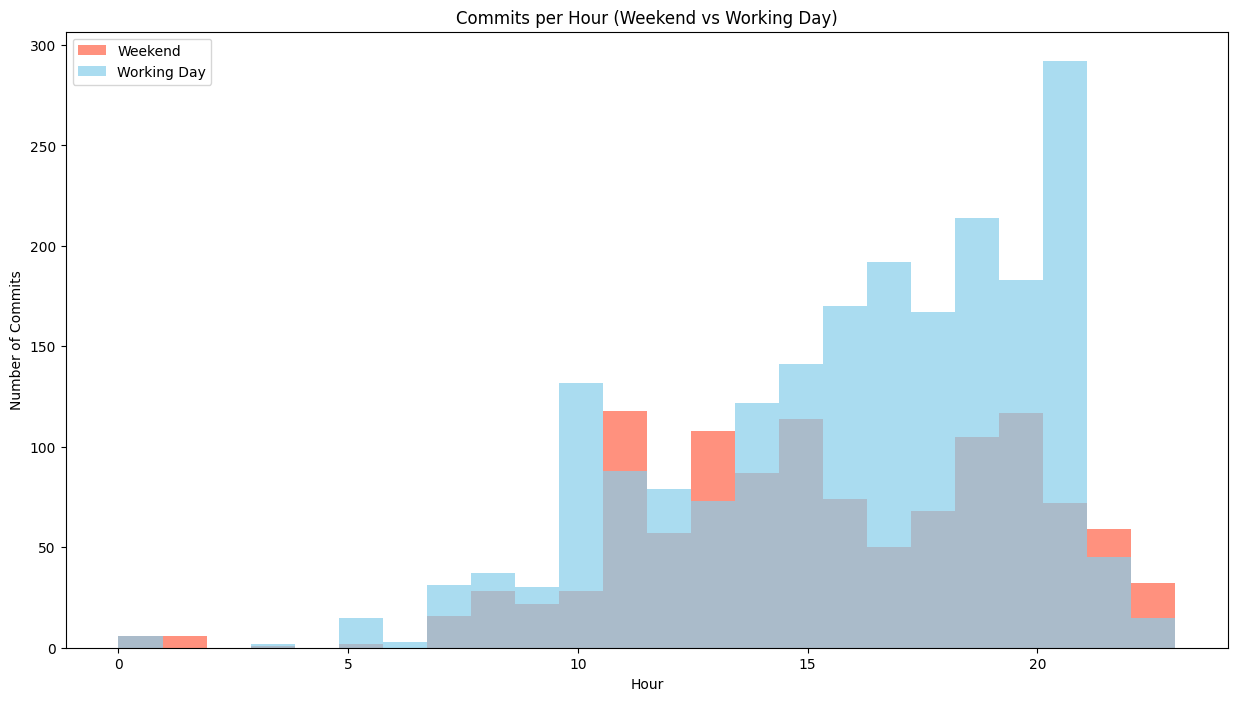

In [3]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

weekend_mask = df['day_of_week'].isin(['Saturday', 'Sunday'])
working_days_mask = df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

weekend = df[weekend_mask]['hour']
working_day = df[working_days_mask]['hour']

plt.figure(figsize=(15, 8))
plt.hist(weekend, bins=24, alpha=0.7, color='tomato', label='Weekend')
plt.hist(working_day, bins=24, alpha=0.7, color='skyblue', label='Working Day')
plt.title('Commits per Hour (Weekend vs Working Day)')
plt.xlabel('Hour')
plt.ylabel('Number of Commits')
plt.legend()
plt.show()

In [4]:
conn.close()

## Are there hours when the total number of commits was higher on weekends than on working days?

Such hours: 11, 13, 22, 23